In [47]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for i in assets:
    pf_data[i] = wb.DataReader(i, data_source='yahoo', start='2010-1-1')['Adj Close']

pf_data

,PG,^GSPC
Date,,
2010-01-04,41.439644,1132.989990
2010-01-05,41.453205,1136.520020
2010-01-06,41.256580,1137.140015
2010-01-07,41.032845,1141.689941
2010-01-08,40.978603,1144.979980
...,...,...
2022-11-03,132.029999,3719.889893
2022-11-04,134.440002,3770.550049
2022-11-07,136.500000,3806.800049


<AxesSubplot:xlabel='Date'>

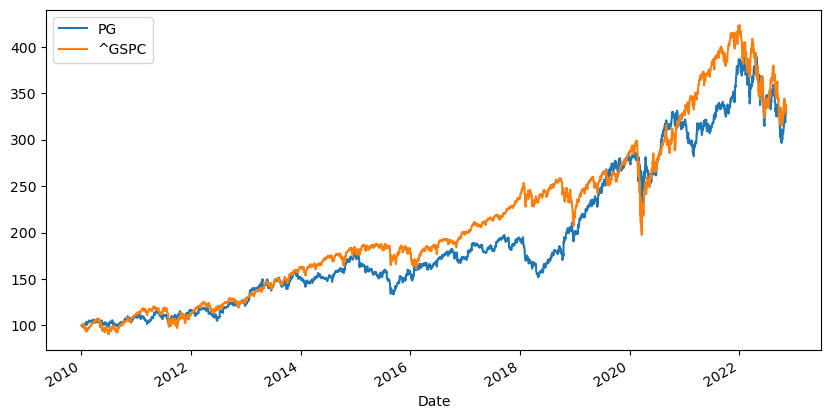

In [49]:
(pf_data/pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [50]:
log_return = np.log(pf_data/pf_data.shift(1))

In [51]:
log_return.mean() * 250

PG       0.092084
^GSPC    0.092438
dtype: float64

In [52]:
log_return.cov() * 250

,PG,^GSPC
PG,0.030060,0.017599
^GSPC,0.017599,0.031441


In [53]:
log_return.corr()

,PG,^GSPC
PG,1.000000,0.572438
^GSPC,0.572438,1.000000


In [54]:
num_assets = len(assets)
num_assets

2

In [55]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.49553336, 0.50446664])

In [56]:
# Expected portfolio return

np.sum(weights*log_return.mean()) * 250

0.09226263970335027

In [57]:
# Expected portfolio variance
np.dot(weights.T, np.dot(log_return.cov()*250, weights))

0.024181382731443837

In [58]:
# Expected portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights)))

0.1555036421806378

In [59]:
portf_return = []
portf_volatilities = []

for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portf_return.append(sum(weights*log_return.mean()) * 250)
    portf_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*250, weights))))

portf_return = np.array(portf_return)
portf_volatilities = np.array(portf_volatilities)
portf_return, portf_volatilities

(array([0.09237735, 0.09237806, 0.0922444 , 0.09235094, 0.09237604,
        0.09222744, 0.0922603 , 0.09242757, 0.09226323, 0.09225935,
        0.09232746, 0.09223403, 0.09226428, 0.09219634, 0.09222656,
        0.09222125, 0.09230125, 0.09213193, 0.09229584, 0.09231227,
        0.09238202, 0.09225193, 0.09229502, 0.09218509, 0.09221346,
        0.0920941 , 0.09227998, 0.09214274, 0.09233839, 0.09224727,
        0.09222074, 0.09222337, 0.09215444, 0.09234527, 0.0923173 ,
        0.09214259, 0.09217639, 0.09221238, 0.09231636, 0.09221581,
        0.09237783, 0.09225196, 0.09235059, 0.09231757, 0.09238881,
        0.09227204, 0.09238234, 0.09243759, 0.09230813, 0.09217969,
        0.09220048, 0.09238124, 0.09225966, 0.09228713, 0.09210475,
        0.09221052, 0.0924282 , 0.09231986, 0.09223255, 0.09212608,
        0.09230529, 0.09231175, 0.09221756, 0.0921752 , 0.09232572,
        0.09224473, 0.09212183, 0.09225186, 0.09242445, 0.09223947,
        0.09219959, 0.09220541, 0.09228656, 0.09

In [60]:
portfolios = pd.DataFrame({'Return':portf_return, 'Volatility':portf_volatilities})
portfolios

,Return,Volatility
0,0.092377,0.165764
1,0.092378,0.165877
2,0.092244,0.155461
3,0.092351,0.161949
4,0.092376,0.165556
...,...,...
995,0.092244,0.155466
996,0.092294,0.156621
997,0.092256,0.155436
998,0.092279,0.155907


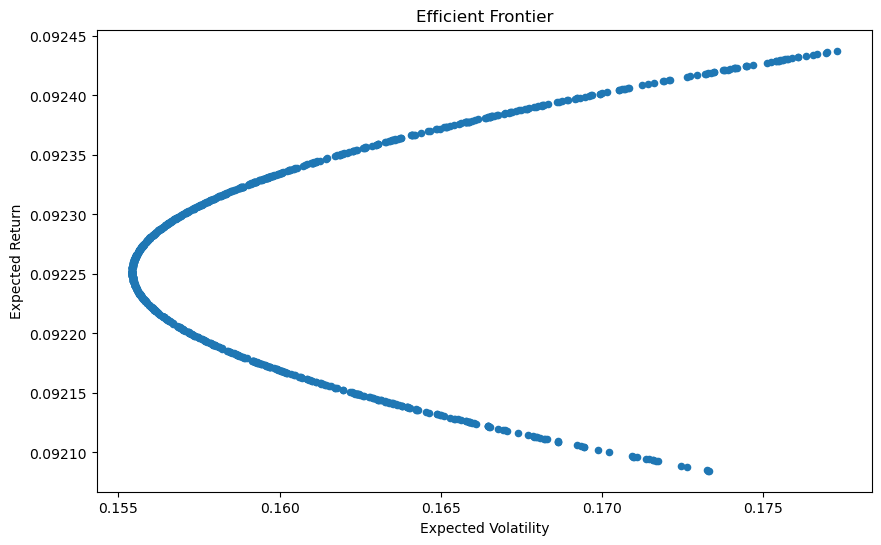

In [61]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()